# Stellar Mass Table distribution fit
*Parse table from csv file*

In [19]:
from pandas import read_csv


df = read_csv('stellar_orbital_eccentricity.csv')
df.head()

,eccentricity,p,p_moderate,p_close,p_very_close
0,0.95,0.00463,0.000000,0.000000,0.000000
1,0.90,0.01389,0.000000,0.000000,0.000000
2,0.80,0.02778,0.004630,0.000000,0.000000
3,0.70,0.11574,0.041667,0.004630,0.000000
4,0.60,0.21296,0.115741,0.041667,0.004630
5,0.50,0.36574,0.337963,0.212963,0.087963
6,0.40,0.16666,0.240741,0.240741,0.166667
7,0.30,0.04630,0.097222,0.125000,0.115741
8,0.20,0.02778,0.069444,0.115741,0.125000
9,0.10,0.01389,0.046296,0.097222,0.125000


## Discrete probabilities
*the p column contains probability of the dice rolls corresponding to the eccentricities*

In [2]:
x = df.eccentricity
y = df.p
x.sum()

5.45

*creating random sample of 1000 elements from given probabilities*

In [3]:
from random import choices

sample = choices(list(x), weights=list(y), k=1000)

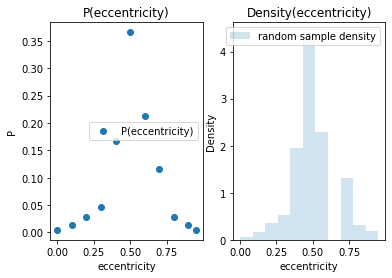

In [21]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x, y, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample, density=True, histtype='bar', align='mid', bins=len(x), alpha=0.2, label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()
plt.show()

## Continuous random variable fit
*Fitting a truncated normal distribution to the random sample*

In [7]:

import numpy as np

xa, xb = x.min(), x.max()
mu = x.mean()
sigma = x.std() ** 2
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-4.70842332613391, 4.319654427645788, 0.4954545454545455, 0.10522727272727272)

In [8]:
from scipy.stats import truncnorm
from scipy.stats import kstest

dist = truncnorm(a, b, mu, sigma)
r = kstest(sample, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.485, pvalue=0.21667552332446272)

*Density function from the fitted continuous random variable*

In [9]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [10]:
fit_sample = dist.rvs(size=10000)

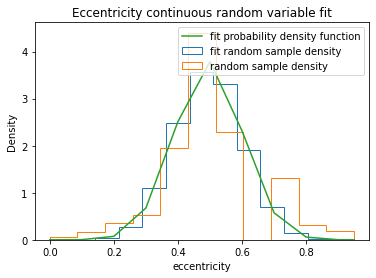

In [23]:
_, ax = plt.subplots()
ax.set_title(r"Eccentricity continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='step', bins=len(x), label='fit random sample density')
ax.hist(sample, density=True, histtype='step', bins=len(x), label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .95]*

In [108]:
all(v >= 0 and v <= .9 for v in fit_sample)

False